# Telco Churn Classification Project
### Tyler Applegate     -     Florence Cohort     -     2021.06.01

In [1]:
# imports

# general imports
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

# my specific imports
import acquire
import prepare
import explore
# import model

# acquire imports
from env import host, user, password

# prepare imports
from sklearn.model_selection import train_test_split

# explore imports
import matplotlib.pyplot as plt
import seaborn as sns
# model imports

# evaluate imports

### Project Planning

- Create a README.md ith project and business goals, as well as data dictionay and initial hypothoses.
- Create a function (or functions) to automate the process of connecting to the Codeup Database, and acquiring the telco_churn dataframe.
- Save these functions to aquire.py so they can be imported into the final_report notebook.
- Create a series of functions to automate the process of cleaning and preparing the newly acquired telco_churn dataframe to get it ready for the exploratory, modeling, and MVP stages of the pipeline.
- Save these functions to prepare.py so they can be imported into the final_report notebook.
- Clearly define at least two hypotheses, set an alpha, run necessary statistical testing, reject, or fail to reject each null hypothesis, and document findings are key takeaways.
- Establish a baseline accuracy, model improvement goals.
- Train at least 3 different classification models.
- Evaluate these models on the train, and validate data sets.
- Choose the best model to evaluate on the test dataset.
- Create a csv file with the customer id, churn prediction, and actual churn.
- Document takeways, key findings, conclusions, and next steps in the final report notebook.

### Executive Summary - Conclusion & Next Steps

### Data Acquisition

In [2]:
# connect to Codeup Database and read in telco_churn to a DataFrame
df = acquire.get_telco_data()

In [3]:
# let's see what we're working with
acquire.overview(df)

This dataframe has 7043 rows and 24 columns.
----------------------------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-nu

### Data Acquisition - Key Findings and Takeaways:
- Always remember to push up the .gitignore first, to keep login credentials private/secure
- The get_connection function will work for any database in the Codeup database (IF you have login credentials.)
    - If you do not, this function can be adjusted to work with whatever database you do have credentials for
- The new_telco_data function is great for this project, and can be tweaked to work for others...
    - Always test of the sql_query in Sequal Ace first!!!!!
    - This query can be as simple of complex as you need it to be
- The get_telco_data function is a wonderful time saver / effeciency optimisor
    - The function will first look to see if there is a .csv of the db stored locally, and open it if available
    - If not, it will run the new_telco_data function to acquire the telco_churn, and store it to the local
- The overview function is a great way to get a bird's eye view of the dataset
- This dataset is 7043 rows, by 24 columns.
- At first glance, there do not appear to be any missing values.

### Data Preparation

In [4]:
# reassign the df variable using my prep_1_telco function
df = prepare.prep_1_telco(df)
# what does the new df look like?
df.info()
# I chose to add new columns, before deleting/altering existing ones, so that I could double-check my work,
# and have a fallback/restart point if necessary in the future

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7032 non-null   int64  
 1   internet_service_type_id  7032 non-null   int64  
 2   contract_type_id          7032 non-null   int64  
 3   gender                    7032 non-null   object 
 4   senior_citizen            7032 non-null   int64  
 5   partner                   7032 non-null   object 
 6   dependents                7032 non-null   object 
 7   tenure                    7032 non-null   int64  
 8   phone_service             7032 non-null   object 
 9   multiple_lines            7032 non-null   object 
 10  online_security           7032 non-null   object 
 11  online_backup             7032 non-null   object 
 12  device_protection         7032 non-null   object 
 13  tech_support              7032 non-null   object 
 14

In [5]:
# now I'm going to use my prep_2_telco function to delete duplicate/extraneous columns
df = prepare.prep_2_telco(df)
# what does it look like now?
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0016-QLJIS to 9986-BONCE
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   senior_citizen   7032 non-null   int64  
 1   monthly_charges  7032 non-null   float64
 2   total_charges    7032 non-null   float64
 3   auto_pay         7032 non-null   int64  
 4   dsl              7032 non-null   int64  
 5   fiber            7032 non-null   int64  
 6   has_internet     7032 non-null   int64  
 7   m2m              7032 non-null   int64  
 8   one_year         7032 non-null   int64  
 9   two_year         7032 non-null   int64  
 10  has_contract     7032 non-null   int64  
 11  is_male          7032 non-null   int64  
 12  has_partner      7032 non-null   int64  
 13  has_dep          7032 non-null   int64  
 14  tenure_months    7032 non-null   int64  
 15  has_phone        7032 non-null   int64  
 16  multi_phone      7032 non-null   int64  
 17  has_

In [6]:
# let's split the data into train, validate, and test groups
train, validate, test = prepare.split_data(df)
# what doe each of these dataframes look like?
print(f'   train: {train.shape}')
print(f'validate: {validate.shape}')
print(f'    test: {test.shape}')

   train: (3937, 25)
validate: (1688, 25)
    test: (1407, 25)


### Data Preparation - Key Findings and Takeaways
- Starting out with a dataframe that is 7043 rows by 24 columns with no null values
- The prep_1_telco function takes the existing dataframe, and generates new columns to convert objects into numerical values
    - It also searches for whitespace, and replaces with NaN value, and in this case, drops those 11 rows
    - I chose to drop the 11 rows that were so new, they had yet to receive a bill, and thus did not have a total charge
    - Since they represented 11/7043 or 0.0015% of the dataframe, there is no issue with data integrity
- The prep_2_telco function drops all object and duplicate columns, to give the fewest number of columns
- The split_data function takes the df and splits into a train, validate, and test set
    - To replicate, please use the same random state of 1221, and stratify on 'has_churn'

### Data Exploration

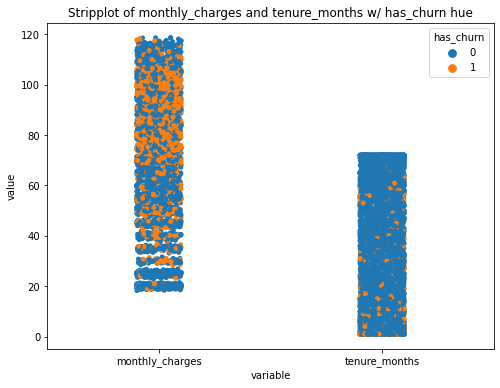

In [7]:
# let's melt the data, so we can get some fancy vizuals
melt = explore.telco_melt(df)
explore.telco_strip(melt)

###### Stripplot Takeaways
- It appears there is a relationship between monthly charges and churn
- This is not a good visual for observing potential relationship between tenure and churn

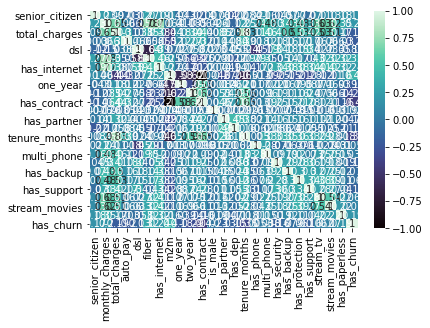

In [9]:
sns.heatmap(train.corr(), cmap='mako', center=0, annot=True)
plt.show()